# Analysis of the Runtime

In this notebook, we now analyze the performance of the different experiment-wares (in this case, MIP solvers) in terms of runtime.
More precisely, we only compare the solvers based on the time they used to prove the optimality of their best bound (and thus, solvers that failed to prove the optimality of this bound are considered as having reached the timeout, independantly of this bound).

## Imports

As usual, we start by importing the needed classes and functions from *Metrics-Wallet*.

In [1]:
from metrics.wallet import BasicAnalysis, DecisionAnalysis, LineType
from metrics.wallet import find_best_cpu_time_input

## Loading the data of the experiments

In a [dedicated notebook](load_experiments.ipynb), we already read and preprocessed the data collected during our experiments.
We can now simply reload the cached `BasicAnalysis` to retrieve it.

In [2]:
basic_analysis = BasicAnalysis.import_from_file('.cache')

Since we now want to perform a more specific analysis, we need to create a `DecisionAnalysis` that will provide methods dedicated to the analysis of the runtime of experiments.

In [3]:
analysis = DecisionAnalysis(basic_analysis=basic_analysis)

## Virtual Best Solver

The *Virtual Best Solver* (or VBS) is a solver that does not really exist.
Its runtime on a particular instance is that of the fastest solver that solves this instance (even though one could define a VBS based on other criteria).
If one had an oracle to select the best solver to solve an input instance, and then solve this instance, its runtime would be that of the VBS.

In [4]:
analysis = analysis.add_virtual_experiment_ware(function=find_best_cpu_time_input, name='VBS')

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


We can now compute the contribution of each solver to the VBS.

In [5]:
analysis.remove_experiment_wares(['VBS'])\
        .contribution_table(deltas=(1, 10))

,vbew simple,vbew 1s,vbew 10s,contribution
experiment_ware,,,,
$CPLEX_{barrier}$,38,19,2,0
$CPLEX_{concurrent-optimizers}$,29,13,0,0
$SCIP_{barrier}$,23,22,16,8
$CPLEX_{default}$,23,8,2,0
$SCIP_{barrier-crossover}$,19,11,5,0
$SCIP_{default}$,8,6,6,3


Let us describe how to read this table.
In the first column, we can see for each solver the number of input instances for which the runtime of the solver is equal to that of the VBS.
In the second column (resp.  third column),  we can see for each solver the number of input instances for which the solver is at least 1 second faster (resp. 10 seconds faster) than any other solver.
Finally, in the fourth column, we can see the number of instances that are solved by this solver only (and thus, all other solvers reached the time limit before finding or proving an optimal solution).

## Overview of the results

An overview of the results can easily be obtained using a so-called *cactus-plot*, which is a figure that is particularly popular in the SAT or CP communities.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cactus-plot of MIP solvers'}, xlabel='Number of solved inputs', ylabel='Time (s)'>)

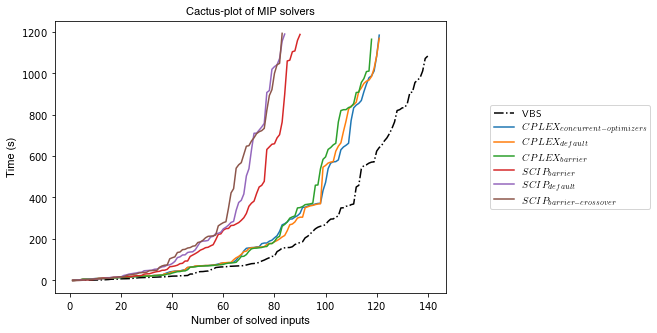

In [6]:
analysis.cactus_plot(
    show_marker=False,
    cactus_col='cpu_time',

    title='Cactus-plot of MIP solvers',
    x_axis_name='Number of solved inputs',
    y_axis_name='Time (s)',

    color_map={ 'VBS': '#000000' },
    style_map={ 'VBS': LineType.DASH_DOT },

    latex_writing=True,
)

On this plot, we can easily read for each solver how many inputs it can solve within a certain time limit.
In particular, the more a solver is to the right, the more instances it can solve.
Thus, we can easily see here that *CPLEX*-based solvers are the best in our experiments, even though there is still a gap between these solvers and the VBS.

We can also observe on this cactus-plot that the best version of *SCIP* is the *barrier* variant.
However, it is also the version of the solver on which we identified inconsistent results, so we must consider this observation before making any conclusion.

Another way to get an overview of the results is to use the *cumulative distribution function* (CDF), which may be seen as a cactus-plot in which the axes have been switched.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'CDF of MIP solvers'}, xlabel='Time (s)', ylabel='Number of solved inputs'>)

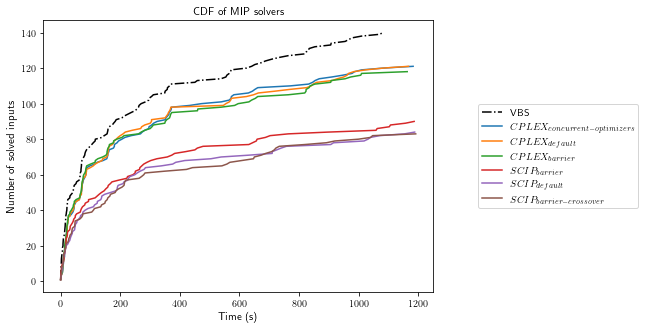

In [7]:
analysis.cdf_plot(
    show_marker=False,
    cdf_col='cpu_time',

    title='CDF of MIP solvers',
    x_axis_name='Time (s)',
    y_axis_name='Number of solved inputs',

    color_map={ 'VBS': '#000000' },
    style_map={ 'VBS': LineType.DASH_DOT },

    latex_writing=True,
)

The interpretation of this plot is similar to that of a cactus-plot.
One of the advantage of this representation is that the order of the lines in the plot is the same as those of the legend, and thus best solvers are on the top.
Additionally, it has more connections with the theory of statistics (while cactus-plots are not so meaningful outside the community).

Talking about statistics, box-plots can also be used to have an overview of the distribution of the runtime of the different solvers.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Box-plots of the runtime of MIP solvers'}>)

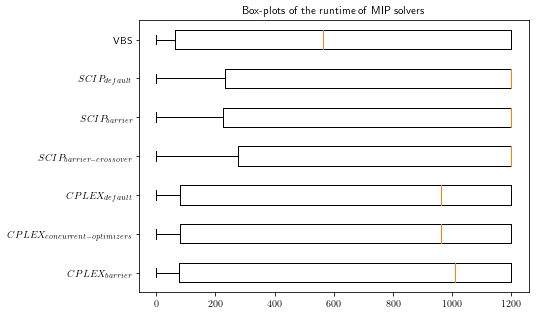

In [8]:
analysis.box_plot(
    box_by='experiment_ware',
    box_col='cpu_time',

    title='Box-plots of the runtime of MIP solvers',

    latex_writing=True
)

These boxplots confirm what we already observed in the cactus-plot and CDF-plot above.
Indeed, we can see that, for example, the median of the runtime of *SCIP*-based solvers (as well as the third quartile) is equal to the time limit, while that of *CPLEX*-based solvers is lower.

## Pairwise comparisons

Now that we have an overview of the results, we can make a pairwise comparison of the solvers, to have a closer look at their behavior.
We can do so by drawing so-called *scatter-plots*.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Comparison between $SCIP_{default}$ and $CPLEX_{default}$'}, xlabel='$SCIP_{default}$', ylabel='$CPLEX_{default}$'>)

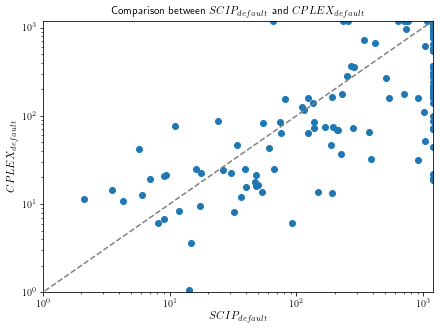

In [9]:
analysis.scatter_plot(
    '$SCIP_{default}$',
    '$CPLEX_{default}$',

    scatter_col='cpu_time',
    title='Comparison between $SCIP_{default}$ and $CPLEX_{default}$',

    x_min=1,
    x_max=1200,
    y_min=1,
    y_max=1200,

    logx=True,
    logy=True,

    latex_writing=True,
)

As it could be expected based on the observations above, many instances are solved faster with *CPLEX* (there are more points below the diagonal than above).
However, there are still instances that *SCIP* solves faster, and even instances that *SCIP* solves while *CPLEX* cannot solve them within the time limit.

Of course, we can also compare two *CPLEX*-based solvers using a scatter-plot.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Comparison between $CPLEX_{default}$ and $CPLEX_{barrier}$'}, xlabel='$CPLEX_{default}$', ylabel='$CPLEX_{barrier}$'>)

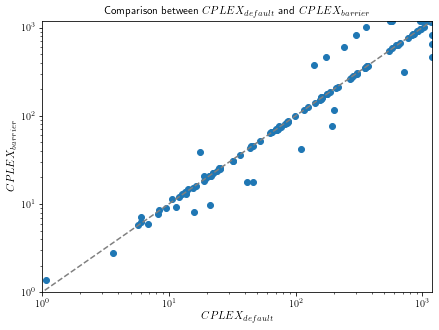

In [10]:
analysis.scatter_plot(
    '$CPLEX_{default}$',
    '$CPLEX_{barrier}$',

    scatter_col='cpu_time',
    title='Comparison between $CPLEX_{default}$ and $CPLEX_{barrier}$',

    x_min=1,
    x_max=1200,
    y_min=1,
    y_max=1200,

    logx=True,
    logy=True,

    latex_writing=True,
)

Here, we can see that, for most instances, there is no change on the runtime by switching from one configuration of *CPLEX* to another (there are many points on the diagonal).
However, for some instances, the option has an impact.

While the analysis presented in this notebook only presents two scatter-plots for demonstration purposes, it may be useful for you to draw more scatter-plots, based on your needs.
In fact, all pariwise comparisons between two solvers could be visualized using scatter plots.